Привет! Меня зовут Александр Арасланов, я провожу ревью твоей работы. Предалагю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-danger"> ❌
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

<div class="alert alert-success"> ✅
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning"> ⚠️
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>


Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.


<div class="alert alert-danger">

**❌Комментарий ревьюера**

Михаил, к сожалению твой код упал с ошибкой `AttributeError: 'Rectangle' object has no property 'ylabel'` Пожалуйста, внеси исправления и присылай работу на повторную проверку. То что отработало до этого момента я проверил. В целом все хорошо, но оставил тебе несколько рекомендаций. Так же пришлось изменить путь к файлу для проверки проекта на севере. Пожалуйста не забывай, указывать перед отправкой корректный путь. Иначе другой ревьюер из за этого может сразу же вернуть проект на доработку.
    
Перед отправкой проверь проект на полную работоспособность через `Kernel/Restart and Run all`
</div>

## Импорт библиотек

In [1]:
import pandas as pd                                             # импорт библитеки pandas
import numpy as np                                              # импорт библитеки numpy
import matplotlib.pyplot as plt
from scipy import stats as st                                   # импорт библитеки scipy.stats
import warnings                                                 # импорт службы warnings
warnings.simplefilter("ignore")

## Чтение файла

In [2]:
data = pd.read_csv('/datasets/games.csv')                        # чтение файла, лежащего в одной папке с файлом проекта
data.info()                                            # вывод информации о датафрейме
data.head()                                            # вывод первых 5 строк датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

В информации о датафрейме видны пропуски в названиях игр, году выхода, жанре, оценках критиков, пользователей и рейтингах ESRB. Пропусков в названиях и жанрах игр всего 2, видимо, сыграл человеческий фактор и кто-то совершал ошибки при заполнении датафрейма. Пропуски же в годах можно восстановить, ведь игры на разные платформы выходят, как правило, в один год и, если, для одной платформы забыли указать год, то можно взять год выхода на других платформах. Пропуски в оценках и рейтингах присутствуют потому, что, видимо, разработчики игр не считали целесообразным тратиться на получение этих оценок и рейтингов.

<div class="alert alert-success">

**✅Комментарий ревьюера**

Данные успешно считаны и получены основные сведения о них 👍</div>

## Подготовка данных

### Приведение столбцов к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()          # приведение названий столбцов к правильному виду (нижнему регистру)
data.tail(20)                                      # проверка получившегося

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


### Исправление ошибок в данных

В ходе работы было обнаружено, что для платформы 'DS' есть данные с ошибочным годом выпуска игры, учитывая, что платформа появилась только в 2004.

In [4]:
print(data.query('platform == "DS"')['year_of_release'].unique())  # поиск уникальных годов выпуска игр на платформе DS
data.query('(platform == "DS") and year_of_release == 1985')       # вывод подозрительной игры на экран

[2006. 2005. 2010. 2009. 2004. 2007. 2012. 2008. 2011.   nan 2013. 1985.]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


<div class="alert alert-success">

**✅Комментарий ревьюера**

Здорово, что нашел такой артефакт</div>

Игра всего одна и малым количеством информации, её можно исключить из анализа.

In [5]:
data = data.loc[data['name'] != 'Strongest Tokyo University Shogi DS'] # перезаписывем датафрейм без ошибочной игры
data = data.reset_index(drop=True)                                     # производим переиндексацию дата
data.info()                                   # проверяем результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
name               16712 non-null object
platform           16714 non-null object
year_of_release    16445 non-null float64
genre              16712 non-null object
na_sales           16714 non-null float64
eu_sales           16714 non-null float64
jp_sales           16714 non-null float64
other_sales        16714 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Приведение данных к нужным типам

Оценки пользователей имеют неподходящий тип.

#### Оценки пользователей

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В оценках пользователей встречается значение tbd, которое означает "To Be Determined" или "Будет определено". Это означает, что средняя оценка игры ещё не посчитана.

<div class="alert alert-success">

**✅Комментарий ревьюера**

Успешно заменил `tbd`, молодец</div>

In [7]:
data.loc[(data.user_score == 'tbd'), 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
name               16712 non-null object
platform           16714 non-null object
year_of_release    16445 non-null float64
genre              16712 non-null object
na_sales           16714 non-null float64
eu_sales           16714 non-null float64
jp_sales           16714 non-null float64
other_sales        16714 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Вывод**

Оценки пользователей теперь иемют тип float, пусть Nanы и сохранились, но обработке данных это не помешает.

### Замена пропусков

#### Названия игр

Как показывают данные, есть всего 2 пропуска в названиях игр. Для их устранения достаточно дать им имя "Unknown game"

In [8]:
data['name'] = data['name'].fillna('Unknown game')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
name               16714 non-null object
platform           16714 non-null object
year_of_release    16445 non-null float64
genre              16712 non-null object
na_sales           16714 non-null float64
eu_sales           16714 non-null float64
jp_sales           16714 non-null float64
other_sales        16714 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Год выхода игры

In [9]:
data_zero_year = data[data['year_of_release'].isna()]['name']    # получаем список игр с пропусками
display(data_zero_year)
for name_nan in data_zero_year:                                      # в цикле идём по этому списку
    if (len(data.query('name == @name_nan')['year_of_release'].dropna().unique()) == 1): # если в данных есть год выпуска на     
                                # хотя бы одной другой платформе и год выпуска на этих платформах одинаковый, то присваеваем            
        data['year_of_release'].loc[(data.name == name_nan)] = data['year_of_release'].loc[(
            data.name == name_nan)].fillna(sum(data.query(                                   # игре на всех платформах
            'name == @name_nan')['year_of_release'].dropna())/len(data.query(                # среднее значение года выхода
            'name == @name_nan')['year_of_release'].dropna()))                               # (т.к. года выхода совпадают, то
data.info()                                                                                 # и среднее совпадёт с годом выхода
                                                                                            # на всех платформах)
data['year_of_release'].unique()
#data.query('name == @name_nan')['year_of_release']

183                        Madden NFL 2004
377                       FIFA Soccer 2004
456             LEGO Batman: The Videogame
475             wwe Smackdown vs. Raw 2006
609                         Space Invaders
                       ...                
16372    PDC World Championship Darts 2008
16404                        Freaky Flyers
16447                            Inversion
16457          Hakuouki: Shinsengumi Kitan
16521                         Virtua Quest
Name: name, Length: 269, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
name               16714 non-null object
platform           16714 non-null object
year_of_release    16556 non-null float64
genre              16712 non-null object
na_sales           16714 non-null float64
eu_sales           16714 non-null float64
jp_sales           16714 non-null float64
other_sales        16714 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

<div class="alert alert-success">

**✅Комментарий ревьюера**

Отличная идея для востановления года выпуска</div>

К сожалению некоторые пропуски в годах остались, ведь есть игры, которые выходили только на одной платформе или года выхода на платформах разные, и пропуск для них не восстанавливается по условию в коде(

**Вывод**

Оставшиеся пропущенные значения заполнять средним или медианным значением считаю нецелесообразным, ведь Nanы не мешают обработке данных, а самих данных не так много, чтобы экономить вычислительные ресурсы за счёт перевода типа данных из float в int. Заполнение Nanов средними величинами может смазывать реальную картину, поэтому данный способ избавления от Nanов я не использовал. 

### Подсчёт суммарных продаж

In [10]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Распределение игр по годам

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

Графику стоит дать название, чтобы одозначно было понятно какая величина на нем отображена</div>

<div class="alert alert-block alert-info">

Название оси и самого графика добавил. </div>

Text(0, 0.5, 'number_of_games')

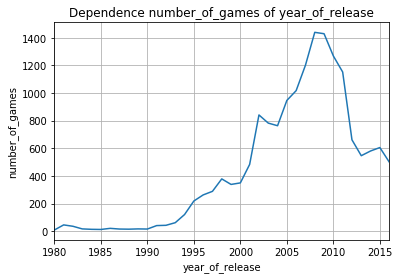

In [11]:
data_grouped_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count') # создаём сводную таблицу
data_grouped_years = data_grouped_years.reset_index()        # по годам выхода игры и производим переиндексацию
data_grouped_years.plot( x = 'year_of_release', y = 'name', legend=False, grid = True)
plt.title("Dependence number_of_games of year_of_release")
plt.ylabel("number_of_games")

**Вывод**

Бурное развитие игровой индустрии началось с 1993 года. Максимум производства игр пришёлся на 2007-2008 годы. После чего пошло резкое падение количества игр на рынке. Видимо публика становилась всё требовательней. Необходимо было производить качественные игры с красивой графикой, а это требует большого времени разработки и параметр количество игр в год упал.

Поскольку нас интересует период активных продаж игр, а не начало их появления на рынке, то данные вплоть до 1993 года можно не рассматривать. 



In [12]:
data = data.query('year_of_release >= 1993')  # перезаписываем датафрейм с играми за период активных продаж 
data.info()    # проверяем датафрейм

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16252 entries, 0 to 16713
Data columns (total 12 columns):
name               16252 non-null object
platform           16252 non-null object
year_of_release    16252 non-null float64
genre              16250 non-null object
na_sales           16252 non-null float64
eu_sales           16252 non-null float64
jp_sales           16252 non-null float64
other_sales        16252 non-null float64
critic_score       8065 non-null float64
user_score         7532 non-null float64
rating             9856 non-null object
sum_sales          16252 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


### Распределение продаж для топ-5 платформ по годам

Топ-5 платформ - это 5 платформ с самыми высокими выручками за представленный период

In [13]:
data_top5 = data.pivot_table(index = 'platform', values = 'sum_sales' , aggfunc='sum').sort_values( # создаём сводную табл.
    by = 'sum_sales', ascending = False).head()        # по платформам с суммарными продажами, сортируем по убыванию и берём
# только первые 5 строчек
data_top5 = data_top5.reset_index()                  # производим переадресацию
print('Топ-5 платформ')
data_top5['platform']                                # вывод названий платформ

Топ-5 платформ


0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

Верно определил топ 5 платформ за все время. Графики построил понятные, но им опять же лучше дать названия</div>

<div class="alert alert-block alert-info">

Постарался облагородить графики. </div>

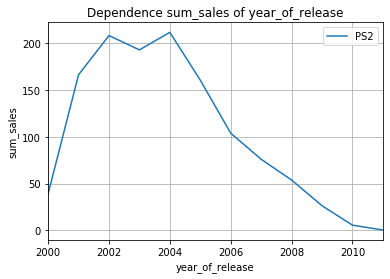

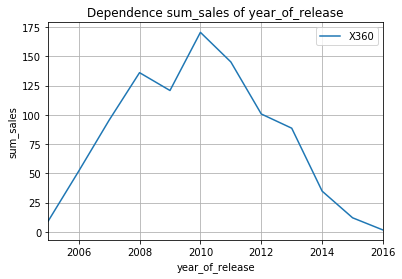

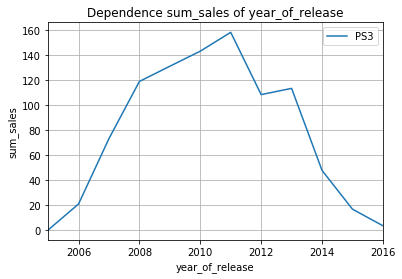

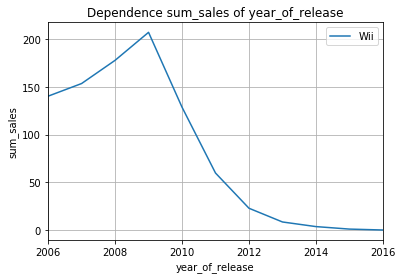

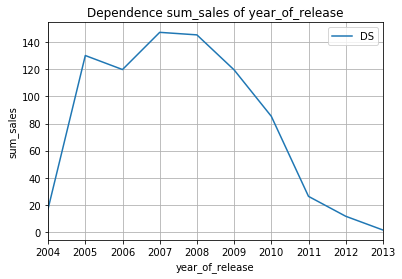

In [14]:
top_platforms = data_top5['platform']           # создаём отдельную переменную с топ-5 платформ
data_top5_years = data.query('platform in @top_platforms').pivot_table(          # создаём сводную таблицу суммарных продаж
    index = ['platform','year_of_release'], values = 'sum_sales', aggfunc='sum') # игр по платформам и годам выхода
for name in data_top5['platform']:         # строим в цикле графики распределения по годам для топ-5 платформ 
    data_top5_years.loc[pd.IndexSlice[name,:],:].reset_index().plot(
        x = 'year_of_release', y = 'sum_sales', label = name, grid = True)
    plt.ylabel("sum_sales")
    plt.title("Dependence sum_sales of year_of_release")

### Определение актуального периода


Под временем жизни платформы будем понимать период с момента появления платформы, вплоть до момента снижения количества продаж ниже 20 млн. долл.

In [15]:
periods = []                               # создаём пустой список, в который будем записывать период жизни платформ
for name in data_top5['platform']:         # в цикле считаем периоды жизни платформ из топ-5
    periods.append(len(data_top5_years.loc[pd.IndexSlice[name,:],:].query('sum_sales > 20')))
print(f'Среднее время жизни платформы: {round(sum(periods)/len(periods))} лет') # выводим усреднённое время 
# жизни платформы
print(f'Актуальным периодом для платформ является срок: {int(round(sum(periods)/len(periods))/2)} года')

Среднее время жизни платформы: 8 лет
Актуальным периодом для платформ является срок: 4 года


**Вывод**

Все платформы проходят период бурного роста, стагнации и падения популярности.Окончательное падение популярости было оценено продажами меньше 20 млн. долл. Такая оценка дала близкие величины актуальных периодов каждой платформы. 

### Выбор данных за актуальный период на 2016 год

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

В качестве актуального периода я бы взял половину среднего срока жизни платформы. Или начиная от года выпуска консолей последнего поколения, таких как PS4 и XOne</div>

<div class="alert alert-block alert-info">

Актуальный период изменил </div>

In [16]:
data_actual = data.query('year_of_release >= 2013') # перезаписываем в датафрейм данные за актуальный период
data_actual = data_actual.reset_index(drop=True)    # производим переиндексацию
data_actual.info()
data_actual['platform'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 12 columns):
name               2236 non-null object
platform           2236 non-null object
year_of_release    2236 non-null float64
genre              2236 non-null object
na_sales           2236 non-null float64
eu_sales           2236 non-null float64
jp_sales           2236 non-null float64
other_sales        2236 non-null float64
critic_score       993 non-null float64
user_score         1194 non-null float64
rating             1258 non-null object
sum_sales          2236 non-null float64
dtypes: float64(8), object(4)
memory usage: 209.8+ KB


PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      191
X360    186
WiiU    115
PSP      68
Wii      23
DS        8
Name: platform, dtype: int64

Датафрейм за актуальный период не содержит пропусков в годах выхода игры. Можно смело менять тип данных на int.

In [17]:
data_actual['year_of_release'] = data_actual['year_of_release'].astype('int')   # меняем тип данных на int
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Выбор потенциально прибыльных платформ

In [18]:
data_actual_top7 = data_actual.pivot_table(index = 'platform', values = 'sum_sales' , aggfunc='sum').sort_values( # создаём 
    by = 'sum_sales', ascending = False).head(7)            # сводную таблицу по продажам для платформ за актуальный период
# сортируем её по убыванию и берём первые 7 позиций
data_actual_top7 = data_actual_top7.reset_index()      # проводим переиндексацию
data_actual_top7  # выводим на экран топ-7 за актуальный период

,platform,sum_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.71


<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

Здесь сделал все хорошо, но опять же графикам стоит дать названия. И я бы добавил в список перспективных платформ так же PC. Все таки игры на него тоже выходят регулярно, путь и в меньших объемах</div>

<div class="alert alert-block alert-info">

Графики подправил. Из-за пересмотра актуального периода пришлось пересмотреть и перспективные платформы, в которые попал PC. </div>

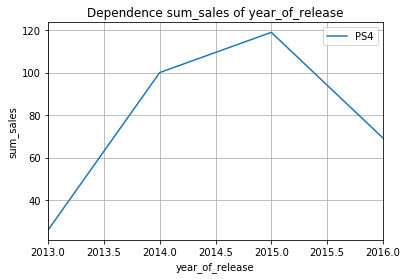

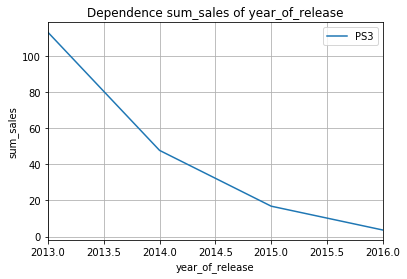

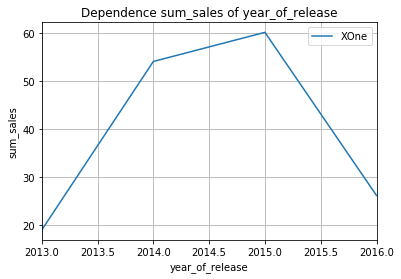

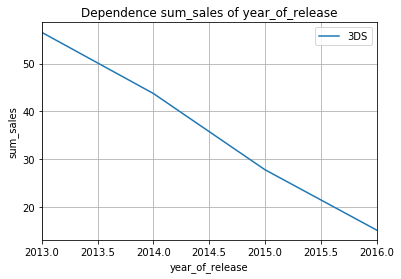

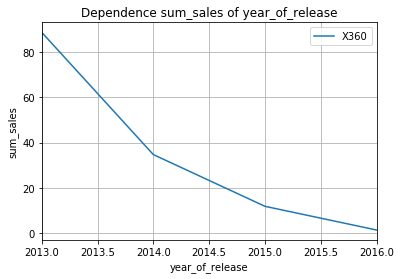

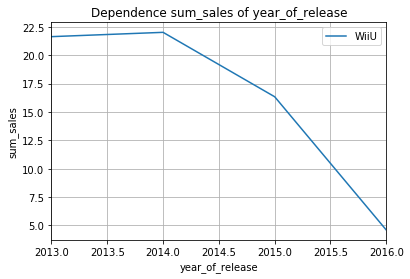

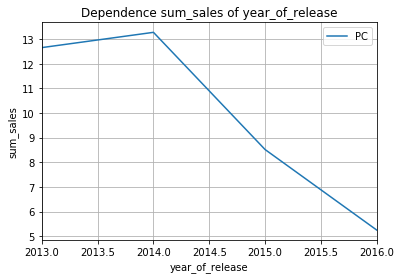

In [19]:
top_actual_platforms = data_actual_top7['platform']  # создаём отдельную переменную с популярными платформами за акт. период
data_actual_top7_years = data_actual.query('platform in @top_actual_platforms').pivot_table(  # создаём сводную таблицу сум.
    index = ['platform','year_of_release'], values = 'sum_sales', aggfunc='sum')              # продаж по платформам и годам
# игр
for name in data_actual_top7['platform']: # в цикле строим графики распределения сум. продаж для каждой платформы
    data_actual_top7_years.loc[pd.IndexSlice[name,:],:].reset_index().plot(
        x = 'year_of_release', y = 'sum_sales', label = name, grid=True)
    plt.ylabel("sum_sales")
    plt.title("Dependence sum_sales of year_of_release")

**Вывод**

Из графиков видно, что все топовые платформы показывают падение продаж в 2016 г. Для поиска нескольких перспективных платформ из топ-7 я выбрал условие, что продажи этой платформы не должны монотонно падать. Такими платформами оказались PS4, Xbox One, WiiU и PC. Результат вполне логичен, ведь это современные платформы.

### График "ящик с усами" в разбивке по платформам

Построим в начале график по всем платформам.

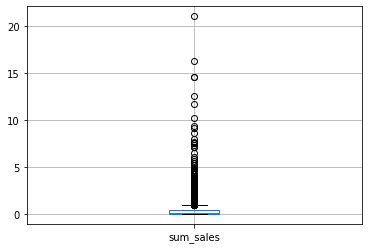

In [20]:
data_actual.boxplot('sum_sales')         

Из графика видно, что в данных много провальных игр. Наш магазин нацелен на продажи успешных и популярных игр, поэтому провальные и непопулярные игры следует исключить. Так как перспективные платформы значительно отличаются по суммарным продажам, то граница "провальности" будет у каждой платформы своя.

(0, 10)

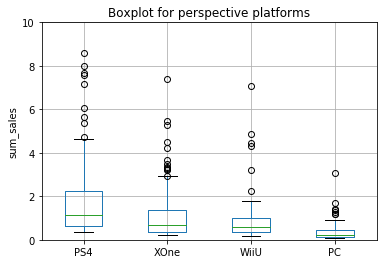

In [21]:
border_spectr = []                          # задаём пустой массив, где будут храниться границы провальности игр
for plat in ['PS4', 'XOne','WiiU','PC']:                                                                             # находим среднее зна-
    border_spectr.append((data_actual.query('platform == @plat')['sum_sales'].max() + data_actual.query( # чение относительно
    'platform == @plat')['sum_sales'].min()) / 2 * 0.05)                                                 # разброса для каждой
########################################################################################################## платформы. Считаем 
# игру провальной, если её продажи ниже 5% от вычисленного таким образом среднего

data_PS4 = data_actual.query('platform == "PS4" and sum_sales > @border_spectr[0]')['sum_sales']  # фильтруем успешные проекты 
# на PS4 и берём значение сумманых продаж
data_XOne = data_actual.query('platform == "XOne" and sum_sales > @border_spectr[1]')['sum_sales'] # фильтруем успешные проекты 
# на XOne и берём значение сумманых продаж
data_WiiU = data_actual.query('platform == "WiiU" and sum_sales > @border_spectr[2]')['sum_sales'] # фильтруем успешные проекты
# на WiiU и берём значение сумманых продаж
data_PC = data_actual.query('platform == "PC" and sum_sales > @border_spectr[3]')['sum_sales'] # фильтруем успешные проекты
# на PC и берём значение сумманых продаж

data_perspective = pd.concat([data_PS4, data_XOne, data_WiiU, data_PC], axis=1) # создаём датафрейм из значений суммарных продаж успешных проектов на
# 2 рассматриваемых платформах
data_perspective.columns = ['PS4','XOne','WiiU', 'PC'] # переименовываем названия столбцов
data_perspective.boxplot()  # выводим диаграмму с усами для перспективных платформ
plt.ylabel("sum_sales")
plt.title("Boxplot for perspective platforms")
plt.ylim([0, 10])



<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

Бокс плоты рекомендую сделать крепнее засчет параметра `ylim`</div>

<div class="alert alert-block alert-info">

Бокс плоты немного обрезал сверху для увеличения масштаба </div>

**Вывод**

По полученной диаграмме с усами можно видеть, что распределение сумммарной выручки на четырёх платформах не описывается нормальным распределением. Медианы всех платформ смещены к 0. PS4 выглядит более интересным, поскольку у этой платформы медианное значение выше.

### Определение влияния оценок пользователей и критиков на продажи для платформы PS4


В качестве популярной и перспективной платформы рассмотрим Playstation 4.


#### Влияние оценок критиков

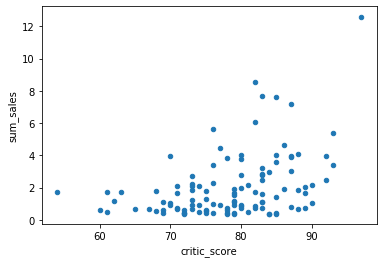

Корреляция между суммарными продажами и оценкой критиков: 0.4055823401864579


In [22]:
data_actual_PS4 = data_actual.query('platform == "PS4" and sum_sales > @border_spectr[0]') # берём данные по успешным играм на 
# платформе PS4
data_actual_PS4.plot(x='critic_score', y='sum_sales', kind='scatter') # стоим диаграмму рассеяниядля отзывов пользователей и 
# суммарных продаж
plt.show()
print('Корреляция между суммарными продажами и оценкой критиков:', data_actual_PS4['sum_sales'].corr(
    data_actual_PS4['critic_score']))  # вычисление соответствующей корреляции

#### Влияние оценок пользователей

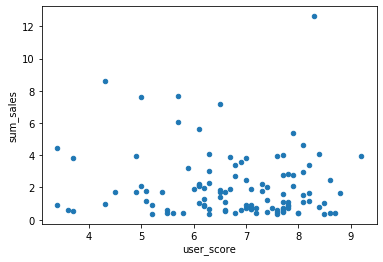

Корреляция между суммарными продажами и оценкой пользователей: -0.08996574274181433


In [23]:
data_actual_PS4.plot(x='user_score', y='sum_sales', kind='scatter') # строим диаграмму рассеяния для отзывов пользователей и 
# суммарных продаж
plt.show()
print('Корреляция между суммарными продажами и оценкой пользователей:',data_actual_PS4['sum_sales'].corr(
    data_actual_PS4['user_score'])) # вычисление соответствующей корреляции

<div class="alert alert-success">

**✅Комментарий ревьюера**

Здесь все сделал хорошо, со всем согласен</div>

**Вывод**

Между оценкой критиков и объёмом выручки действительно есть слабая корреляция, а вот оценки пользователей никак не связаны с выручкой игры. Корреляция между оценками пользователей и выручкой близка к 0.

### Определение влияния оценок пользователей и критиков на продажи для других платформ

In [24]:
border_all = (data_actual.query('platform == @plat')['sum_sales'].max() + data_actual.query( # определение границы провальности
    'platform == @plat')['sum_sales'].min()) / 2 * 0.05             # для других платформ

print('Корреляция между суммарными продажами и оценкой критиков:', data_actual.query(
    'platform != "PS4" and sum_sales >= @border_all')['sum_sales'].corr(data_actual['critic_score']))
print('Корреляция между суммарными продажами и оценкой пользователей:', data_actual.query(
    'platform != "PS4" and sum_sales >= @border_all')['sum_sales'].corr(data_actual['user_score']))

Корреляция между суммарными продажами и оценкой критиков: 0.27967664180394164
Корреляция между суммарными продажами и оценкой пользователей: 0.0005082296370531389


**Вывод**

Для других платформ оценки критиков не так значимы для выручки, но некая взаимосвязь всё-таки есть. Что же касается оценок пользователей, то они и здесь никак не влияют на выручку.  Различия в корреляции для PS4 и для других платформ кроется в том, что PS4 - современная и перспективная платформа, к ней обращено внимание публики, а многие другие платформы из датафрейма уже на закате популярности. Для игр с этих платформ хоть 10 из 10 поставь, всё равно выручка сильно не вырастет.

### Распределение игр по жанрам. Поиск популярных и непопулярных жанров

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

Лучше было бы здесь построить боксплоты, это позволило бы оценить распредлеения. Увидеть квартили, выбросы, медиану. </div>

In [25]:
data_genres = data_actual.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values( # создаём сводную таблицу
    by='sum_sales', ascending=False)          # по жанрам игр за актуальный период, сортируем таблицу по убыванию
print('Самыми популярными жанрами являются:') 
display(data_genres.head(3))           # выводим топ-3 жанра
print('Самыми непопулярными жанрами оказались:')
display(data_genres.tail(3))           # выводим 3 жанра в хвосте популярности

Самыми популярными жанрами являются:


,sum_sales
genre,
Action,322.15
Shooter,232.98
Sports,150.65


Самыми непопулярными жанрами оказались:


,sum_sales
genre,
Simulation,21.76
Strategy,10.08
Puzzle,3.17


**Вывод**

Как показывают данные, люди предпочитают динамичные игры. Игры спокойные и требующие умственного напряжения плетутся в конце топа.  

## Портрет пользователя каждого региона

В начале исследования портретов будут приведены данные отдельно по регионам, а затем приведены совмещённые данные для удобства анализа.

### Регион NA

<div class="alert alert-warning">

**⚠️Комментарий ревьюера**

В целом хорошо справился с построением портретов пользователя для каждого сегмента. Но бы посоветовал сделать его не отдельно для каждого региона, а наоборот отдельно по каждому параметру, но по регионам вместе. Так регионы будет легче друг с другом сравнивать. Например на одном графке можно сразу же показать топ 5 платформ каждого региона. Или не не графике, а таблицей</div>

<div class="alert alert-block alert-info">

Да, у меня как раз далее приводятся графики для каждого параметра, совмещённые по регионам. </div>

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


,genre,na_sales
0,Action,126.07
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


Text(0.5, 1.0, 'Barplot of sum_sales for different ratings')

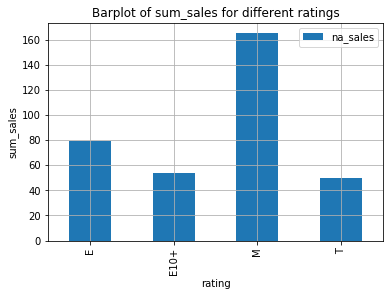

In [26]:
data_top5_na = data_actual.pivot_table(index = 'platform', values = 'na_sales' , aggfunc='sum').sort_values( # создаём сводную
    by = 'na_sales', ascending = False).head().reset_index()             # таблицу продаж в СА по платфомам, берём первые 5
# строк и переиндексируем их
display(data_top5_na)  # вывод топ-5 платформ в СА
genres_top5_na = data_actual.pivot_table(index='genre', values='na_sales', aggfunc = 'sum').sort_values( # создаём сводную
    by = 'na_sales', ascending = False).head().reset_index()            # таблицу продаж в СА по жанрам, берём первые 5 строк
# и переиндексируем их
display(genres_top5_na) # вывод топ-5 жанров в СА
rating_na = data_actual.pivot_table(                     # создаём сводную таблицу продаж игр за актуальный период по рейтигу
    index = 'rating', values='na_sales', aggfunc='sum') # 
rating_na.plot(kind='bar', grid=True) # вывод диаграммы
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different ratings")

### Регион EU

Самые популярные платформы в Европе


,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


Самые популярные жанры в Европе


,genre,eu_sales
0,Action,118.36
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


Text(0.5, 1.0, 'Barplot of sum_sales for different ratings')

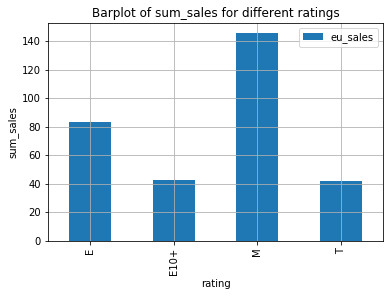

In [27]:
data_top5_eu = data_actual.pivot_table(index = 'platform', values = 'eu_sales' , aggfunc='sum').sort_values( # создаём сводную
    by = 'eu_sales', ascending = False).head().reset_index()              # таблицу продаж в Европе по платфомам, берём первые 5
# строк и переиндексируем их
print('Самые популярные платформы в Европе') 
display(data_top5_eu) # вывод топ-5 платформ в Европе
genres_top5_eu = data_actual.pivot_table(index = 'genre', values = 'eu_sales' , aggfunc='sum').sort_values( # создаём сводную
    by = 'eu_sales', ascending = False).head().reset_index()        # таблицу продаж в СА по жанрам, берём первые 5 строк
# и переиндексируем их
print('Самые популярные жанры в Европе')
display(genres_top5_eu) # вывод топ-5 жанров в Европе
rating_eu = data_actual.pivot_table( # создаём сводную таблицу продаж игр за актуальный период по рейтигу
    index = 'rating', values='eu_sales', aggfunc='sum')
#ax = rating_eu.plot(kind='bar') 
rating_eu.plot(kind='bar', grid=True) # вывод диаграммы
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different ratings")

### Регион JP

'Самые популярные платформы в Японии'

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Самые популярные жанры в Японии


,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61


Text(0.5, 1.0, 'Barplot of sum_sales for different ratings')

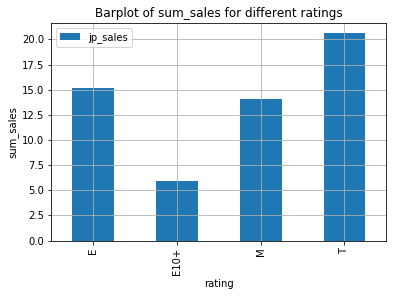

In [28]:
data_top5_jp = data_actual.pivot_table(index = 'platform', values = 'jp_sales' , aggfunc='sum').sort_values( # создаём сводную
    by = 'jp_sales', ascending = False).head().reset_index()  # таблицу продаж в Японии по платфомам, берём первые 5
# строк и переиндексируем их
display('Самые популярные платформы в Японии', data_top5_jp) # вывод топ-5 платформ в Японии
print('Самые популярные жанры в Японии') # вывод топ-5 жанров в Японии
genres_top5_jp = data_actual.pivot_table(index = 'genre', values = 'jp_sales' , aggfunc='sum').sort_values( # создаём сводную
    by = 'jp_sales', ascending = False).head().reset_index() # таблицу продаж в Японии по жанрам, берём первые 5 строк
# и переиндексируем их
display(genres_top5_jp)
rating_jp = data_actual.pivot_table( # создаём сводную таблицу продаж игр за актуальный период по рейтигу
    index = 'rating', values='jp_sales', aggfunc='sum')
rating_jp.plot(kind = 'bar', grid=True) # вывод диаграммы
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different ratings")

<div class="alert alert-danger">

**❌Комментарий ревьюера**

В ячейке ниже увы код упал с ошибкой `AttributeError: 'Rectangle' object has no property 'ylabel'` Пожалуйста, внеси исправления и присылай работу на повторную проверку. 
</div>

<div class="alert alert-block alert-info">

Теперь всё работает </div>

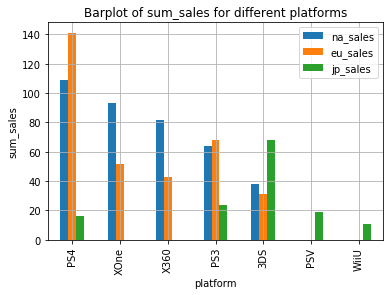

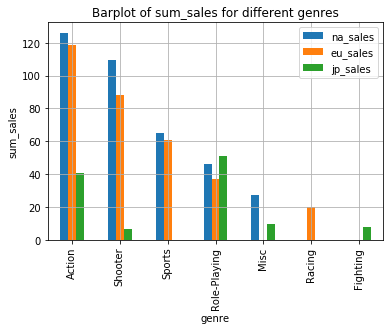

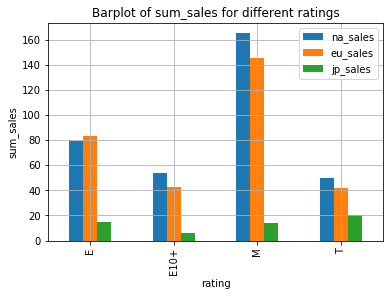

In [29]:
data_top5_na_eu = data_top5_na.merge(data_top5_eu, on='platform',  how='outer')        # объединяем датафреймы в один
data_top5_na_eu_jp = data_top5_na_eu.merge(data_top5_jp, on='platform',  how='outer')  #
data_top5_na_eu_jp.plot(x='platform', kind='bar', grid=True)
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different platforms")
plt.show()
genres_top5_na_eu = genres_top5_na.merge(genres_top5_eu, on='genre',  how='outer')         # объединяем датафреймы в один
genres_top5_na_eu_jp = genres_top5_na_eu.merge(genres_top5_jp, on='genre',  how='outer')   #
genres_top5_na_eu_jp.plot(x='genre', kind='bar', grid=True)
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different genres")
plt.show()
rating_na_eu_jp = rating_na.join([rating_eu, rating_jp])         # объединяем series в один датафрейм
rating_na_eu_jp.plot(kind='bar', grid=True)
plt.ylabel("sum_sales")
plt.title("Barplot of sum_sales for different ratings")
plt.show()

<div class="alert alert-success">

**✅Комментарий ревьюера В2**

Хорошо, исправления принял 👍 Так стало намного нагляднее</div>

**Вывод по 3 регионам**



Платформы:

Распределение по платформам показало, что рынок Северной Америки похож на рынок Европы. Отличия есть, например, в Европе, по сравнению с Америкой, более популярны игры на PS4 и PS3, а в Америке, по сравнению с Европой, рынок XBox 360 и XBox One более развит. Рынок же Японии сильно отличается. Во-первых он меньше по понятным причинам, во вторых на нём популярны карманные игровые приставки. Единственными пересечением всех трёх рынков являются приставки PS3, Wii и 3DS.

Жанры:

В топе игр тоже заметна схожесть рынка Северной Америки и Европы: 4 из 5 популярных жанров повторяются. Отличия лишь в том, что в Европе любят гонки, а в Северной Америке жанр Misc. А вот рынок Японии опять отличился: здесь не любят шутеры, зато предпочитают ролевые игры, Action и Fighting. Все три рынка объединяет любовь к Action и ролевым играм.

Рейтинг ESRB:

Как показывает диаграмма, взаимосвязь между рейтингом и продажами в регионах немного разная. Так, например, в Японии суммарные продажи по рейтингам распределены раномерно, просадки есть только у рейтина E10+. В Северной Америке и Европе есть рейтинги фавориты, так рейтинг M является самым прибыльным. В Европе также как и в СА прибыльными являются игры с рейтингом E и M. Отличия в показателях рейтингов, возможно, связаны с тем, что игры с рейтингом M насыщены зрелищными сценами, а как мы выяснили, самыми популярными жанрами являются жанры с подобными сценами. Все 3 региона объединяет популярность игр с рейтингом E.

## Проверка гипотез

 ### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги разные.

Так как будет использован t-test, проверим размеры выборок.

In [30]:
data_actual_X_one = data_actual.query('platform == "XOne"')['user_score'].dropna() # создаём Series c пользовательскими оценками
# Xbox One без пропусков
data_actual_PC = data_actual.query('platform == "PC"')['user_score'].dropna() # создаём Series c пользовательскими оценками
# PC без пропусков
print("Количество игр платформы XBox One:", len(data_actual_X_one))
print("Количество платформы PC:", len(data_actual_PC))
print('Дисперсия значений для платформы PC:', np.var(data_actual_PC))
print('Дисперсия значений для платформы XOne:',np.var(data_actual_X_one))

Количество игр платформы XBox One: 182
Количество платформы PC: 157
Дисперсия значений для платформы PC: 2.978796705748712
Дисперсия значений для платформы XOne: 1.8965188383045526


Хоть размеры выборок отличаются, не сильно, но вычисленные дисперсии отличаются значительно, поэтому для t-testа необходимо указать, что дисперсии выборок разные.

<div class="alert alert-success">

**✅Комментарий ревьюера В2**

Гипотезы сфрмулировал верно. Здорово, что использовал параметрв `equal_var`</div>

p-значение:  0.13888973874685429
Не получилось отвергнуть нулевую гипотезу
Cредний пользовательский рейтинг PC: 6.26624203821656
Cредний пользовательский рейтинг Xbox One: 6.521428571428572


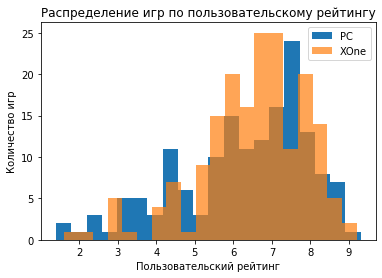

In [31]:
alpha = 0.05   # устанавливаем пороговое значение в 5%



results = st.ttest_ind(                                  # проводим t-тест для двух выборок
    data_actual_X_one,                                   #
    data_actual_PC, equal_var=False)                     # с разной дисперсией
print('p-значение: ', results.pvalue)                    # выводим p-value на экран
if results.pvalue < alpha:                               # сравниваем p-value с пороговым значением
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
data_actual_PC.plot(kind='hist',bins=20, label='PC', legend=True)
data_actual_X_one.plot(kind='hist',bins=20, label='XOne',  alpha=0.7, legend=True)
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Количество игр")
plt.title("Распределение игр по пользовательскому рейтингу")
print('Cредний пользовательский рейтинг PC:', data_actual_PC.mean())
print('Cредний пользовательский рейтинг Xbox One:', data_actual_X_one.mean())




**Вывод**

Нулевая гипотеза оказалась правдоподобной. Действительно, средние пользовательские рейтинги платформ Xbox One и PC с большой долей вероятности одинаковые.

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги разные.

Для начала проверим размеры выборок.

<div class="alert alert-success">

**✅Комментарий ревьюера В2**

Гипотезы сфрмулировал верно. Здорово, что использовал параметрв `equal_var`</div>

In [32]:
data_actual_action = data_actual.query('genre == "Action"')['user_score'].dropna()
data_actual_sports = data_actual.query('genre == "Sports"')['user_score'].dropna()
print('Количество игр в жанре Action:', len(data_actual_action))
print('Количество игр в жанре Sports:', len(data_actual_sports))



Количество игр в жанре Action: 391
Количество игр в жанре Sports: 160




Для проведения t-testа необходимо указать, что дисперсии выборок разные, так как их размеры не одинаковы. 

p-значение:  1.6948835429264077e-20
Отвергаем нулевую гипотезу
Средняя оценка пользователей для жанра Action: 6.833248081841432
Средняя оценка пользователей для жанра Sports: 5.238124999999999


Text(0.5, 1.0, 'Распределение игр по пользовательскому рейтингу')

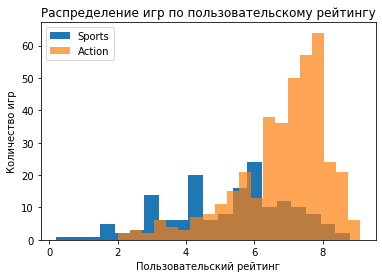

In [33]:
alpha = 0.05    # устанавливаем пороговое значение в 5%

results = st.ttest_ind(                                  # проводим t-тест для двух выборок
    data_actual_action,                                  #
    data_actual_sports, equal_var=False)                 # с разной дисперсией

print('p-значение: ', results.pvalue)                    # выводим p-value на экран

if results.pvalue < alpha:                               # сравниваем p-value с пороговым значением
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя оценка пользователей для жанра Action:', data_actual_action.mean())
print('Средняя оценка пользователей для жанра Sports:', data_actual_sports.mean())
data_actual_sports.plot(kind='hist',bins=20, label='Sports', legend=True)
data_actual_action.plot(kind='hist',bins=20, alpha=0.7, label='Action', legend=True)
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Количество игр")
plt.title("Распределение игр по пользовательскому рейтингу")

**Вывод**

Результаты говорят о том, что нулевая гипотеза с большой долей вероятности не подтвержается. Это означает, что скорее всего, средние пользовательские рейтинги игр жанра Action и Sports разные.

## Общий вывод

В ходе анализа рынка игр я руководствовался принципом, что заполнять пропуски средним или медианным значением не стоит, если это не мешает проведению вычислений. Были отдельно рассмотрены пропуски в названиях игр, пропуски заменены на значение "Unknown game", были рассмотрены пропуски в годах выхода, часть из которых удалось восстановить из информации о годах выхода на других платформах. Значение 'tbd' в оценках пользователей заменено на более привычное Nan. 

Для проведения последующего анализа к датафрейму был добавлен столбец с продажами по всем регионам.

График зависимости выхода игр по годам показал, что развитие этой индустрии началось около 1993 года. Распределения количества игр по годам внутри самых популярных платформ за всё время имеют схожую картину: рост, стагнация, падение. Вычисленный актуальный период платформ составил 4 года. Соответственно для 2017 года актуальными данными являются игры, вышедшие после 2013 года.

Список платформ, лидирующих по продажам за актуальный период:
- PS3, X360, WiiU, PS4, 3DS, XOne, PC

Все они показали падение продаж по результатам 2016 года. Перспективными были выбраны PS4, XOne, WiiU, PC потому что их продажи за актуальный период не представляли собой монотонное падение от года году. Этим платформам удавалось показывать рост. 

При построении ящика с усами для перспективных платформ было выяснено, что много игр являются провальными, для более правильной оценки перспектив от провальных игр пришлось избавиться. Ящик с усами указал на перспективность PS4, поскольку для неё медианное значение оказалось выше.

Для рассмотрения влияния оценок критиков и пользователей на продажи была выбрана PS4. Корреляция оценок критиков и продаж оказалась значительной: 0,41. А вот корреляция оценок пользователей и продаж стремится к 0. Графики рассеивания подтверждают вычисления. 

Для других платформ взаимосвязь между оценками критиков и продажами оказалась не такой значительной: 0,28. Корреляция оценок пользователей и продаж также стремится к 0. Как уже было сказано, высокая корреляция у PS4 объясняется популярностью этой платформы, к ней приковано внимание публики и критиков. Отсутствие влияния оценок пользователей на продажи указывает на то, что в отличие от критика, пользователь не может сильно влиять на покупки другого пользователя (Схема: Петя сказал Васе, купи вот эту крутую игру, реализуется редко).

Продажи игр по жанрам показали популярность динамичных жанров Action и Shooter и непопулярность спокойных и интеллекуальных жанров "Пазлы", "Стратегии"

Что же касается портрета пользователей по регионам, то подробный вывод приведён в соответствующем разделе. Главный итог: рынки СА и Европы похожи, в Японии есть своя специфика: популярность портативных игровых платформ и не такая высокая популярность игр с рейтингом M, как в Европе или СА.

Проверка двух гипотез  с помощью t-testa показала, что: 
- C вероятностью 14% средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- C огромной долей вероятности средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">

**✅Комментарий ревьюера В2**

Супер, исправления принял. Все сделал отлично. С выводами тоже согласен. Успехов тебе в дальнейшей учебе</div>

**Чек лист**

- [x]  открыты файлы
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  заменены названия столбцов
- [x]  изменены типы данных
- [x]  определены пропущенные значения
- [x]  объяснено, почему пропуски заполнены определённым образом или почему это не сделано
- [x]  объяснены возможные причины пропусков
- [x]  исправлены ошибки
- [x]  обращено внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей
- [x]  посчитаны суммарные продажи во всех регионах для каждой игры
- [x]  построен график распредения количества выхода игр по годам 
- [x]  рассмотрено, как менялись продажи внутри самых популярных платформ за всё время
- [x]  определён характерный срок жизни платформы, он же актуальный период
- [x]  для дальнейшего анализа выбраны данные только за актуальный период
- [x]  определены платформы лидеры за актуальный период, определена динамика их продаж
- [x]  определено как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
- [x]  определено как влияют на продажи внутри других платформ отзывы пользователей и критиков
- [x]  определены популярные и непопулярные жанры игр
- [x]  составлены портреты пользователя каждого из трёх регионов (NA, EU, JP). Параметры портретов соотнесены между собой
- [x]  выполнена проверка гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые."
- [x]  выполнена проверка гипотезы: "Средние пользовательские рейтинги жанров Action и Sports (англ. «спортивные соревнования») разные."
- [x]  есть пояснения с формулировкой гипотез и пояснения какой критерий использовался для проверки.
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод